<a href="https://colab.research.google.com/github/putriifeb06/ML-TK-42-ANDI-PUTRI-FEBRIANTI/blob/main/Final%20Exam/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Activation, LeakyReLU
from keras.models import Sequential
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

First we define a set of points on the y = x line

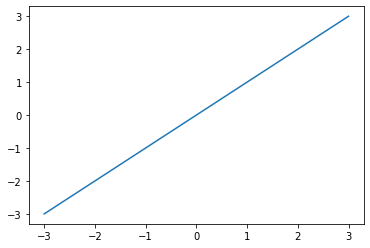

In [2]:
x = np.arange(-3, 3.5, 0.5)
plt.plot(x, x, '-')
plt.show()

Then we build a keras model with one layer: the activation layer.

In our example we use *tanh()* as activation function.

We pass the numbers through the model and get the outputs.

Then we plot both the original points and the model outputs together to see the transformation

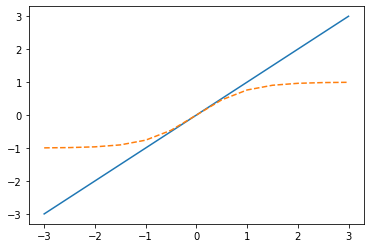

In [3]:
K.clear_session()
model = Sequential([Activation('tanh', input_shape=(1,))])
y_act = model.predict(x)

plt.plot(x, x, '-')
plt.plot(x, y_act, '--')
plt.show()

Now let's do it for different activation functions and plot the results

In [4]:
activations = ['tanh', 'sigmoid', 'relu']
y_acts = []
for activation in activations:
  K.clear_session()
  model = Sequential([Activation(activation, input_shape=(1,))])
  y_act = model.predict(x)
  y_acts.append(y_act)

Since leaky relu cannot be passed as string argument, we treat it separately

In [5]:
K.clear_session()
model = Sequential([LeakyReLU(0.5, input_shape=(1,))])
y_act = model.predict(x)
y_acts.append(y_act)
activations.append('leakyRelu')

In the case of softmax if we pass each number by itself it will always output 1.

Thus we pass all the numbers together and get the corresponding probabilities (each output is in [0, 1] and the sum is 1)

In [6]:
K.clear_session()
model = Sequential([Activation('softmax', input_shape=(len(x),))])
x_sm = np.expand_dims(x, 0)
y_act = model.predict(x_sm)
y_acts.append(y_act[0])
activations.append('softmax')

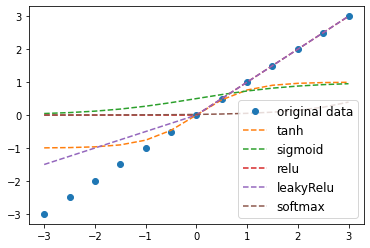

In [7]:
fig, ax = plt.subplots()
ax.plot(x, x, 'o', label='original data')

for y_act, activation in zip(y_acts, activations):
  ax.plot(x, y_act, '--', label=activation)

legend = ax.legend(loc='lower right', fontsize='large')
plt.show()

We can also define a custom activation function using the ordinary functions and keras backend

In [8]:
def sq_activation(x):
  return x**2

K.clear_session()
model = Sequential([Activation(sq_activation, input_shape=(1,))])
y_act = model.predict(x)
activations.append('sq_activation')

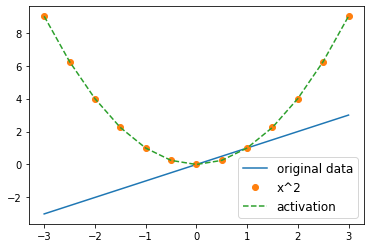

In [9]:
fig, ax = plt.subplots()
ax.plot(x, x, '-', label='original data')
ax.plot(x, x**2, 'o', label='x^2')
ax.plot(x, y_act, '--', label='activation')

legend = ax.legend(loc='lower right', fontsize='large')
plt.show()